<a href="https://colab.research.google.com/github/vinay5751/fruit_classification/blob/master/Fruit360_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [0]:
files.upload()#Upload Your Kaggle API Json File

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinay5751","key":"380ad085e3784ea9e95b5302e45f9de5"}'}

In [0]:
"Creating .kaggke Folder"""
!mkdir -p ~/.kaggle
"""Copying kaggle.json File To .kaggle"""
!cp kaggle.json ~/.kaggle/
"""Changing Access Mode Of File"""
!chmod 600 ~/.kaggle/kaggle.json
pass

In [0]:
"""Downloading Data From Kaggle"""
!kaggle datasets download -d moltean/fruits #Downloading data from kaggle

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
'''Extracting Downloaded File'''
from zipfile import ZipFile
file_name = "/content/fruits.zip"

with ZipFile(file_name,"r") as zip:
    zip.extractall()
    print("Extraction Done")

Extraction Done


In [0]:
"""Importing Modules"""
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import shuffle
from tqdm import tqdm
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
"""Defining Constant Variables"""
TRAIN_DIR = '/content/fruits-360/Training/'
TEST_DIR = '/content/fruits-360/Test/'
IMG_SIZE = 100

In [0]:
"""This function will give label to the image path passed"""
def image_label(img):
    word_label = img.split("/")[-1]
    return(word_label)

In [0]:
"""This function will generate the training data"""
def create_training_data():
    training_data = []
    for img_label in os.listdir(TRAIN_DIR):
        label = image_label(img_label)
        path = os.path.join(TRAIN_DIR,img_label)
        for img in tqdm(os.listdir(path)):
            img = os.path.join(path,img)
            img_ = cv2.imread(img)
            img_ =cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
            #img = cv2.resize(img_, (IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img_),label])
    shuffle(training_data)
    #np.save('train_data.npy', training_data)
    return (training_data)

In [0]:
"""def process_test_data():
    testing_data = []
    for test in os.listdir(TEST_DIR):
        path = os.path.join(TEST_DIR,test)
        for img in path:
            img_name = img.split('.')[0]
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img), img_name])
        
    shuffle(testing_data)
    #np.save('test_data.npy', testing_data)
    return (testing_data)"""

"def process_test_data():\n    testing_data = []\n    for test in os.listdir(TEST_DIR):\n        path = os.path.join(TEST_DIR,test)\n        for img in path:\n            img_name = img.split('.')[0]\n            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)\n            #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))\n            testing_data.append([np.array(img), img_name])\n        \n    shuffle(testing_data)\n    #np.save('test_data.npy', testing_data)\n    return (testing_data)"

In [0]:
def hot_encode(fruit_list):
    values = np.array(fruit_list)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return(onehot_encoded)        

In [0]:
train_data = create_training_data()

100%|██████████| 490/490 [00:00<00:00, 2476.18it/s]


Apple Red Yellow 2


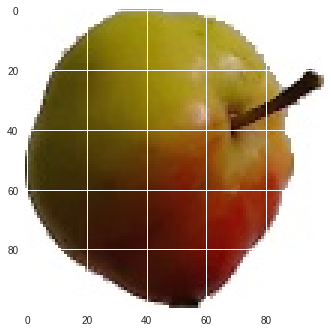

In [0]:
"""This is just made to see the Label and image.
Just change the value of j to do so"""
j=0
print(train_data[j][1])
plt.imshow(train_data[j][0])

In [0]:
arr_train_data = np.array(train_data)

In [0]:
arr_train_data.shape

(48905, 2)

In [0]:
a = set(arr_train_data[:,1])
print(a)

{'Grape Blue', 'Tamarillo', 'Plum 2', 'Strawberry', 'Hazelnut', 'Banana Lady Finger', 'Dates', 'Peach 2', 'Pepino', 'Pomegranate', 'Tomato Cherry Red', 'Salak', 'Plum', 'Grape Pink', 'Pear Williams', 'Pear Monster', 'Chestnut', 'Apple Red 2', 'Granadilla', 'Grape White 2', 'Redcurrant', 'Avocado', 'Pear Abate', 'Kiwi', 'Huckleberry', 'Pear Kaiser', 'Cherry 2', 'Banana Red', 'Mulberry', 'Grape White', 'Apricot', 'Walnut', 'Grape White 4', 'Maracuja', 'Pitahaya Red', 'Mandarine', 'Banana', 'Orange', 'Lemon', 'Apple Golden 1', 'Pineapple Mini', 'Nectarine', 'Quince', 'Plum 3', 'Cherry 1', 'Rambutan', 'Cantaloupe 2', 'Pineapple', 'Kumquats', 'Apple Red Yellow 1', 'Apple Red Delicious', 'Apple Braeburn', 'Tomato 2', 'Cherry Rainier', 'Avocado ripe', 'Lychee', 'Cherry Wax Red', 'Cherry Wax Black', 'Apple Red 3', 'Peach', 'Papaya', 'Raspberry', 'Physalis', 'Passion Fruit', 'Mango', 'Cantaloupe 1', 'Apple Red Yellow 2', 'Apple Golden 3', 'Physalis with Husk', 'Strawberry Wedge', 'Pomelo Sweeti

In [0]:
fruit_list = arr_train_data[:,1]
k = hot_encode(fruit_list)
dic_f = []
for i in range(len(k)):
    dic_f.append([k[i].argmax(),fruit_list[i]])
dic_f = dict(dic_f)
dic_f

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


{0: 'Apple Braeburn',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Granny Smith',
 5: 'Apple Red 1',
 6: 'Apple Red 2',
 7: 'Apple Red 3',
 8: 'Apple Red Delicious',
 9: 'Apple Red Yellow 1',
 10: 'Apple Red Yellow 2',
 11: 'Apricot',
 12: 'Avocado',
 13: 'Avocado ripe',
 14: 'Banana',
 15: 'Banana Lady Finger',
 16: 'Banana Red',
 17: 'Cactus fruit',
 18: 'Cantaloupe 1',
 19: 'Cantaloupe 2',
 20: 'Carambula',
 21: 'Cherry 1',
 22: 'Cherry 2',
 23: 'Cherry Rainier',
 24: 'Cherry Wax Black',
 25: 'Cherry Wax Red',
 26: 'Cherry Wax Yellow',
 27: 'Chestnut',
 28: 'Clementine',
 29: 'Cocos',
 30: 'Dates',
 31: 'Granadilla',
 32: 'Grape Blue',
 33: 'Grape Pink',
 34: 'Grape White',
 35: 'Grape White 2',
 36: 'Grape White 3',
 37: 'Grape White 4',
 38: 'Grapefruit Pink',
 39: 'Grapefruit White',
 40: 'Guava',
 41: 'Hazelnut',
 42: 'Huckleberry',
 43: 'Kaki',
 44: 'Kiwi',
 45: 'Kumquats',
 46: 'Lemon',
 47: 'Lemon Meyer',
 48: 'Limes',
 49: 'Lychee',
 50: 'Mand

In [0]:
"""Replacing string label with hot encoded label"""
count = 0
for item in k:
    arr_train_data[:,1][count] = k[count]
    count+=1

In [0]:
train = arr_train_data[:-10000]
test = arr_train_data[-10000:]

In [0]:
train.shape

(38905, 2)

In [0]:
test.shape

(10000, 2)

In [0]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = [i[1] for i in test]

In [0]:
Y = np.array(Y)
test_y = np.array(test_y)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(95, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
model.fit(X,Y, validation_data=(test_x, test_y),batch_size=500,epochs=15,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 38905 samples, validate on 10000 samples
Epoch 1/15
38905/38905 [==============================] - 36s 925us/step - loss: 3.9580 - acc: 0.4056 - val_loss: 0.1775 - val_acc: 0.9475
Epoch 2/15
31500/38905 [=======================>......] - ETA: 4s - loss: 0.1723 - acc: 0.9448

KeyboardInterrupt: ignored

In [0]:
img = cv2.imread("/content/straw.jpeg")#this image does not belong to testing set, it is a downloaded image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
img = np.array(img)
img = img.reshape(-1,100,100,3)

In [0]:
plt.imshow(img.reshape(100,100,3))

In [0]:
predict = model.predict([img])

In [0]:
dic_f[predict.argmax()]